## < FILM INDUSTRY ANALYSIS FOR KIM >

###  [ 배우와 영화 수익의 관계 ]

- 유명 배우가 출연한 영화의 평균 수익 분석
- 분석 방향 : 특정 배우가 출연한 영화의 박스오피스 수익 평균과 관객 수를 분석하여, 
            배우의 인기가 영화 수익에 미치는 영향을 시각화

[1] 모듈 로딩 및 데이터 준비<hr>

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils_font

In [83]:
M_FILE = '../DATA/movie_actor_men.xlsx'
W_FILE = '../DATA/movie_actor_women.xlsx'
S_FILE = '../DATA/movie_social.xlsx'

In [84]:
## 시각화를 위한 폰트 지정
F_PATH = '../FONT/gulim.ttc'

utils_font.sethangeulFont(F_PATH)

Gulim 폰트 설정


In [85]:
M_FILM_DF = pd.read_excel(M_FILE)
W_FILM_DF = pd.read_excel(W_FILE)
S_DF = pd.read_excel(S_FILE)

In [86]:
## 성별 구분을 위해 gender 컬럼 추가
M_FILM_DF['gender'] = 0
W_FILM_DF['gender'] = 1


[ 데이터 확인 ]<hr>

In [87]:
## 남자 배우 데이터 확인
print(M_FILM_DF.head(3))
print('-'*70)
print(M_FILM_DF.tail(3))

  film_actor    film_name film_director film_production_company  \
0        이정재           헌트           이정재             (주)아티스트스튜디오   
1        이정재  다만 악에서 구하소서           홍원찬             (주)하이브미디어코프   
2        이정재          사바하           장재현                 (주)외유내강   

  film_open_date  film_screen_count  film_income  film_audience film_genre  \
0     2022-08-10               1625  44573032153        4350029         액션   
1     2020-08-05               1998  38554527990        4352669         범죄   
2     2019-02-20               1174  20002183194        2397792       미스터리   

   gender  
0       0  
1       0  
2       0  
----------------------------------------------------------------------
    film_actor   film_name film_director film_production_company  \
195        강동원  형사 Duelist           이명세              웰메이드엔터테인먼트   
196        강동원      늑대의 유혹           김태균                 (주)싸이더스   
197        강동원  그녀를 믿지 마세요           배형준                  ㈜영화사시선   

    film_open_date  film_s

In [88]:
## 여자 배우 데이터 확인
print(W_FILM_DF.head(3))
print('-'*70)
print(W_FILM_DF.tail(3))

  film_actor  film_name film_director film_production_company film_open_date  \
0        송혜교  두근두근 내 인생           이재용                   영화사 집     2014-09-03   
1        송혜교         오늘           이정향            (주)포시즌스카이컴퍼니     2011-10-27   
2        송혜교        페티쉬           손수범              (주)스타피쉬픽쳐스     2010-11-25   

   film_screen_count  film_income  film_audience film_genre  gender  
0                629  12191623034        1611519        드라마       1  
1                207    712814000         131896        드라마       1  
2                  3      6524946            886        스릴러       1  
----------------------------------------------------------------------
    film_actor film_name film_director film_production_company film_open_date  \
103        김윤진    세븐 데이즈           원신연               (주)영화사윤앤준     2007-11-14   
104        김윤진    6월의 일기           임경수               (주)필름앤픽쳐스     2005-12-01   
105        김윤진        밀애       김인규,김민준                  펀펀한영화사     2014-07-24   

   

In [89]:
## DF의 정보 출력
print(M_FILM_DF.info())
print('-'*70)
print(W_FILM_DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   film_actor               198 non-null    object        
 1   film_name                198 non-null    object        
 2   film_director            198 non-null    object        
 3   film_production_company  198 non-null    object        
 4   film_open_date           198 non-null    datetime64[ns]
 5   film_screen_count        198 non-null    int64         
 6   film_income              198 non-null    int64         
 7   film_audience            198 non-null    int64         
 8   film_genre               198 non-null    object        
 9   gender                   198 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 15.6+ KB
None
----------------------------------------------------------------------
<class 'pandas.co

In [90]:
M_FILM_DF['film_actor'].unique()

array(['이정재', '마동석', '이병헌', '송강호', '최민식', '황정민', '류승룡', '조승우', '강동원'],
      dtype=object)

In [91]:
W_FILM_DF['film_actor'].unique()

array(['송혜교', '전지현', '손예진', '김혜수', '전도연', '하지원', '한효주', '엄정화', '김윤진'],
      dtype=object)

- 남자 배우 198row, 10columns 데이터
- 여자 배우 107row, 10columns 데이터 
- 전체 데이터 수 304개 확인

In [92]:
# 결측지 확인
M_FILM_DF.isna().sum()

film_actor                 0
film_name                  0
film_director              0
film_production_company    0
film_open_date             0
film_screen_count          0
film_income                0
film_audience              0
film_genre                 0
gender                     0
dtype: int64

In [93]:
# 결측지 확인
W_FILM_DF.isna().sum()

film_actor                 0
film_name                  0
film_director              0
film_production_company    0
film_open_date             0
film_screen_count          0
film_income                0
film_audience              0
film_genre                 0
gender                     0
dtype: int64

In [94]:
# 고유값 확인
M_FILM_DF['film_income'].unique()

array([ 44573032153,  38554527990,  20002183194,   6276963402,
        55101410303,  98463132781,   8952096578,  66005451500,
        34881330905,  93665568500,  17310669976,   1886195121,
       110038420734, 104687737771,   5727172661, 131293353478,
        69825366300,  28098934360,  39560195124,  29128292150,
        13236490737,   3797676112,   3720931600, 102476768809,
         9441064230, 115698654137,  11590908298,  56077813249,
          459566121,  93175877048,  16912706195,   2088685200,
        17360123332,   6202433964,     78745100,    656849000,
         8431504719,   5343797000,    315291000,     18961950,
           97348000,  18087442369,  37388022232,  20778871412,
        41223596650,  27441213382,  31067321992,   2685519021,
        58067927865,  56596582057,   3360045489,  88900208769,
            1529006,  14148937025,  43768628939,            0,
         3003379576,  12566618030,   7871240823,  87459829095,
        16222446942,  95284747049,  61158644831,  48842

In [95]:
# 고유값 확인
W_FILM_DF['film_income'].unique()

array([ 12191623034,    712814000,      6524946,            0,
        98463132781,  52354931637,  93665568500,   3688309333,
        17032133166,  20800916128,  44344141109,   2027801239,
        66240631706,  12333110882,  37654858000,  21965313000,
         7170684217,  11995855000,  10591349944,  49685009003,
         2135396020,  30891765837,   1897705564,  16912706195,
        11989400678,  66005451500,   4332815318,   4971421000,
         2307565653,  20778871412,   5442138750,   9786575840,
         1651122533,   3360045489,   3262087431,  13048519745,
         3630557000,  17310669976,   2554838451,  14749476550,
          361142800,   7405415569,   3471341321,  13334762500,
        19314027000,  15764312409,  81934638201,   6301818833,
        12523963990,   6994748173,   3763852759,  16152717131,
        13509581911,  39298005179,  17883988787,  88900208769,
         7591008500,    644989646,     21392500,    888872900,
        10979887910,   7357162869,   5808789500,  15000

In [96]:
# 요약 통계량 확인
M_FILM_DF.describe()

,film_open_date,film_screen_count,film_income,film_audience,gender
count,198,198.000000,1.980000e+02,1.980000e+02,198.0
mean,2014-01-23 16:07:16.363636480,824.611111,2.877360e+10,3.942698e+06,0.0
min,2003-11-21 00:00:00,0.000000,0.000000e+00,0.000000e+00,0.0
25%,2010-01-02 18:00:00,365.750000,2.308655e+09,9.116938e+05,0.0
50%,2014-06-22 00:00:00,672.000000,1.432958e+10,2.136539e+06,0.0
75%,2017-12-08 00:00:00,1229.000000,4.266839e+10,5.979472e+06,0.0
max,2024-10-30 00:00:00,2980.000000,1.396480e+11,1.761368e+07,0.0
std,NaN,664.139728,3.438309e+10,4.118372e+06,0.0


In [97]:
# 요약 통계량 확인
W_FILM_DF.describe()

,film_open_date,film_screen_count,film_income,film_audience,gender
count,106,106.000000,1.060000e+02,1.060000e+02,106.0
mean,2012-02-20 01:21:30.566037760,494.103774,1.498687e+10,2.426475e+06,1.0
min,2004-03-12 00:00:00,0.000000,0.000000e+00,8.860000e+02,1.0
25%,2007-11-17 18:00:00,0.750000,0.000000e+00,5.227690e+05,1.0
50%,2011-11-13 12:00:00,441.000000,5.206780e+09,1.217393e+06,1.0
75%,2015-07-08 00:00:00,795.750000,1.605562e+10,2.462316e+06,1.0
max,2024-08-07 00:00:00,1932.000000,1.108280e+11,1.424600e+07,1.0
std,NaN,446.377695,2.485055e+10,3.257211e+06,0.0


In [98]:
## 두 데이터프레임 합치기
FILM_DF = pd.concat([M_FILM_DF, W_FILM_DF], ignore_index=True)

FILM_DF

,film_actor,film_name,film_director,film_production_company,film_open_date,film_screen_count,film_income,film_audience,film_genre,gender
0,이정재,헌트,이정재,(주)아티스트스튜디오,2022-08-10,1625,44573032153,4350029,액션,0
1,이정재,다만 악에서 구하소서,홍원찬,(주)하이브미디어코프,2020-08-05,1998,38554527990,4352669,범죄,0
2,이정재,사바하,장재현,(주)외유내강,2019-02-20,1174,20002183194,2397792,미스터리,0
3,이정재,대립군,정윤철,리얼라이즈픽쳐스㈜,2017-05-31,809,6276963402,837500,드라마,0
4,이정재,인천상륙작전,이재한,(주)태원엔터테인먼트,2016-07-27,1049,55101410303,7049643,전쟁,0
...,...,...,...,...,...,...,...,...,...,...
299,김윤진,심장이 뛴다,윤재근,(주)오죤필름,2011-01-05,445,7538083500,1006947,드라마,1
300,김윤진,하모니,강대규,(주)제이케이필름,2010-01-28,405,21992266198,3068544,드라마,1
301,김윤진,세븐 데이즈,원신연,(주)영화사윤앤준,2007-11-14,297,0,2120741,스릴러,1
302,김윤진,6월의 일기,임경수,(주)필름앤픽쳐스,2005-12-01,0,0,697980,드라마,1


[ 데이터 분석 ] <hr>

In [99]:
actor_counts = FILM_DF['film_actor'].value_counts()
print(actor_counts)

film_actor
최민식    37
황정민    33
마동석    30
류승룡    23
송강호    22
이병헌    18
엄정화    17
김혜수    15
한효주    14
전도연    14
손예진    14
강동원    13
하지원    13
이정재    12
조승우    10
김윤진     9
송혜교     5
전지현     5
Name: count, dtype: int64


In [100]:
## 배우별 총 매출액 계산
actor_revenue = FILM_DF.groupby('film_actor')['film_income'].sum().reset_index()
actor_revenue


,film_actor,film_income
0,강동원,331866617231
1,김윤진,166802530527
2,김혜수,282487239615
3,류승룡,659789642995
4,마동석,1003629110748
5,손예진,252156794391
6,송강호,683193593427
7,송혜교,12910961980
8,엄정화,172135053455
9,이병헌,495253770139


In [101]:
## 두 데이터 결합 (배우 인기도 &  배우별 작품수 데이터에 추가)
actor_revenue = actor_revenue.merge(S_DF, left_on='film_actor', right_on='actor', how='left')
actor_revenue = actor_revenue.merge(actor_counts, left_on='film_actor', right_on='film_actor', how='left')

actor_revenue

,film_actor,film_income,actor,social_followers,count
0,강동원,331866617231,강동원,1200,13
1,김윤진,166802530527,김윤진,300,9
2,김혜수,282487239615,김혜수,1300,15
3,류승룡,659789642995,류승룡,100,23
4,마동석,1003629110748,마동석,200,30
5,손예진,252156794391,손예진,1700,14
6,송강호,683193593427,송강호,500,22
7,송혜교,12910961980,송혜교,1800,5
8,엄정화,172135053455,엄정화,900,17
9,이병헌,495253770139,이병헌,1500,18


In [102]:
# 배우별 1편당 평균 매출액 칼럼 추가
actor_revenue['film_income_average'] = (actor_revenue['film_income']/actor_revenue['count']).astype('int64')
actor_revenue

,film_actor,film_income,actor,social_followers,count,film_income_average
0,강동원,331866617231,강동원,1200,13,25528201325
1,김윤진,166802530527,김윤진,300,9,18533614503
2,김혜수,282487239615,김혜수,1300,15,18832482641
3,류승룡,659789642995,류승룡,100,23,28686506217
4,마동석,1003629110748,마동석,200,30,33454303691
5,손예진,252156794391,손예진,1700,14,18011199599
6,송강호,683193593427,송강호,500,22,31054254246
7,송혜교,12910961980,송혜교,1800,5,2582192396
8,엄정화,172135053455,엄정화,900,17,10125591379
9,이병헌,495253770139,이병헌,1500,18,27514098341


In [103]:
## 필요 없는 열 삭제
actor_revenue.drop(columns=['actor'], inplace=True)

actor_revenue

,film_actor,film_income,social_followers,count,film_income_average
0,강동원,331866617231,1200,13,25528201325
1,김윤진,166802530527,300,9,18533614503
2,김혜수,282487239615,1300,15,18832482641
3,류승룡,659789642995,100,23,28686506217
4,마동석,1003629110748,200,30,33454303691
5,손예진,252156794391,1700,14,18011199599
6,송강호,683193593427,500,22,31054254246
7,송혜교,12910961980,1800,5,2582192396
8,엄정화,172135053455,900,17,10125591379
9,이병헌,495253770139,1500,18,27514098341


[ 시각화 ]
- 배우별 총 매출액 시각화(막대그래프)
    - 배우별로 출연한 영화들의 총매출액 비교
    - 가장 흥행 성적이 높은 배우를 한눈에 확인 가능
- 배우 인기도 vs 총매출액 상관관계 분석
    - 상관계수 값을 확인하여 배우 인기도가 영화 흥행 성적에 미치는 영향을 분석
    - 산점도와 회귀선을 통해 인기도가 높은 배우일수록 총매출액이 높은지 시각적으로 확인

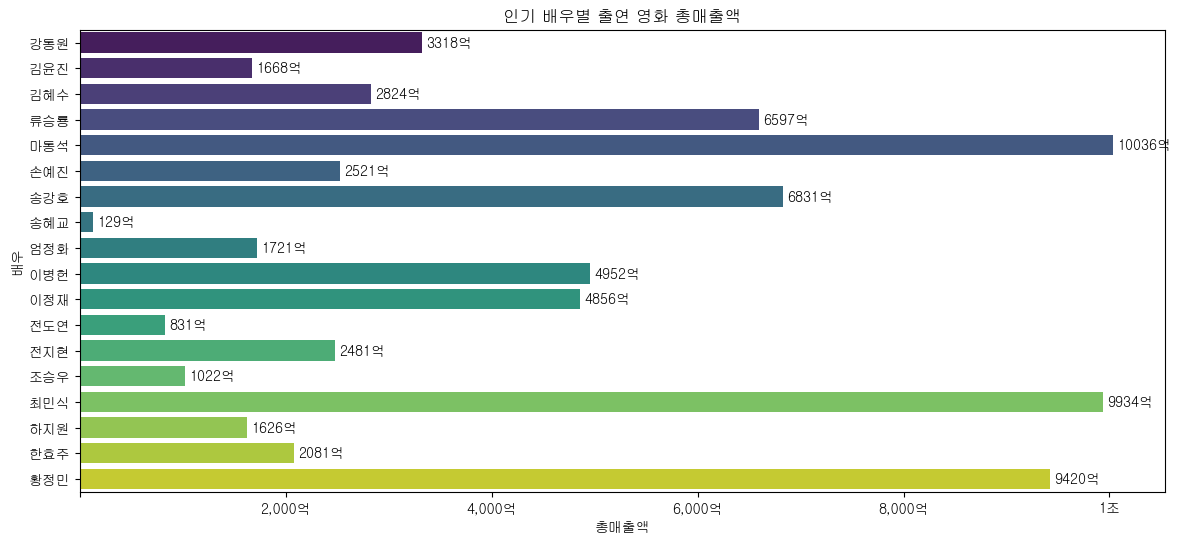

In [110]:
## 배우별 총 매출액 시각화(BAR)

plt.figure(figsize=(14,6))

bar = sns.barplot(x='film_income', y='film_actor',hue="film_actor", data=actor_revenue, palette="viridis")

# 막대 위에 라벨 추가 + (억 단위)으로 변환   
for container in bar.containers:
    labels = [f"{int(val/1e8)}억" if val > 0 else "" for val in container.datavalues]
    bar.bar_label(container, labels=labels, label_type="edge", fontsize=10, padding=3) 

# x축 값 정리
tick_values = [0,200000000000, 400000000000, 600000000000, 800000000000, 1000000000000]
bar.set_xticks(tick_values)
bar.set_xticklabels(['','2,000억', '4,000억', '6,000억', '8,000억', '1조'])

plt.xlabel("총매출액")
plt.ylabel("배우")
plt.title("인기 배우별 출연 영화 총매출액")
plt.show()

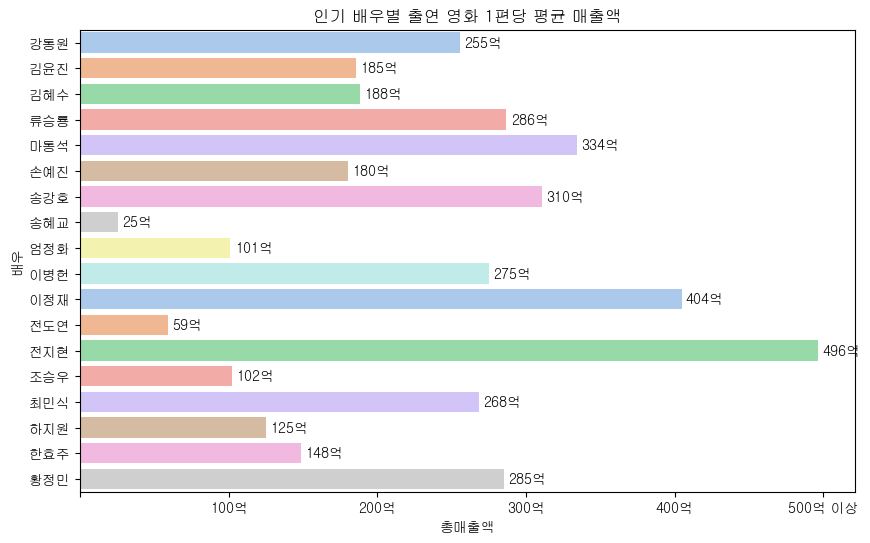

In [112]:
# 배우별 영화 1편당 평균 매출액 시각화(BAR)

plt.figure(figsize=(10,6))

bar = sns.barplot(x='film_income_average', y='film_actor', hue="film_actor", 
                  data=actor_revenue, palette="pastel")

# 막대 위에 라벨 추가 + (억 단위)으로 변환   
for container in bar.containers:
    labels = [f"{int(val/1e8)}억" if val > 0 else "" for val in container.datavalues]
    bar.bar_label(container, labels=labels, label_type="edge", fontsize=10, padding=3)    

# x축 값 정리
tick_values = [0, 10000000000, 20000000000, 30000000000, 40000000000, 50000000000]
bar.set_xticks(tick_values)
bar.set_xticklabels(['', '100억', '200억', '300억', '400억', '500억 이상'])

plt.xlabel("총매출액")
plt.ylabel("배우")
plt.title("인기 배우별 출연 영화 1편당 평균 매출액")
plt.show()

In [106]:
## 배우 인기도 vs 총매출액 상관관계 분석
# 상관관계 계산
correlation = actor_revenue[['social_followers', 'film_income']].corr()
print(correlation)

                  social_followers  film_income
social_followers          1.000000    -0.531868
film_income              -0.531868     1.000000


Text(0.5, 1.0, 'film_income & social_followers')

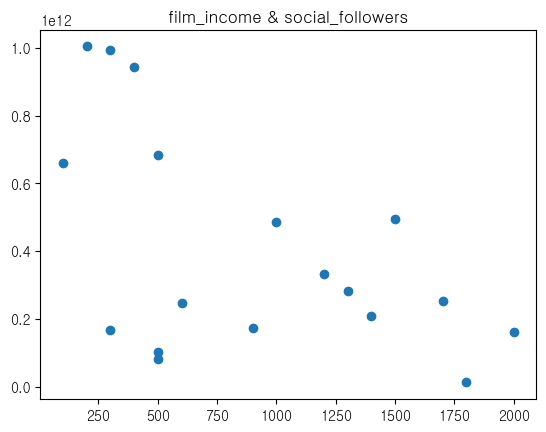

In [107]:
## 산점도
## 배우 인기도와 총매출액의 관계 시각화
xdata = actor_revenue['social_followers']

ydata = actor_revenue['film_income']

plt.plot(xdata, ydata, 'o')
plt.title('film_income & social_followers')

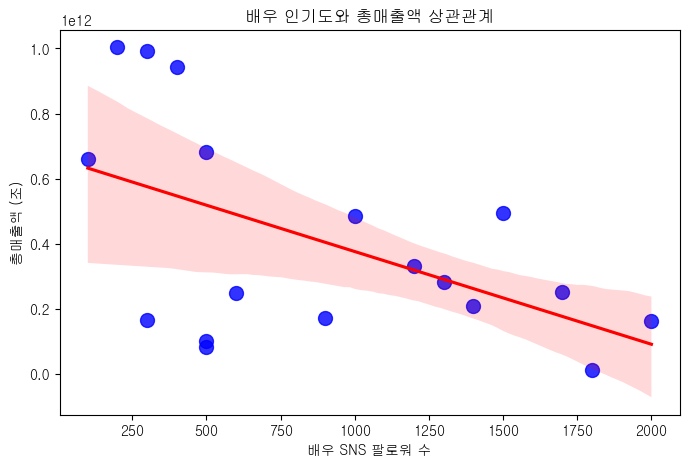

In [108]:
# 산점도 및 회귀선 그래프
plt.figure(figsize=(8, 5))
sns.regplot(x=actor_revenue['social_followers'], y=actor_revenue['film_income'], scatter_kws={'s':100, 'color':'blue'}, line_kws={'color':'red'})
plt.xlabel("배우 SNS 팔로워 수")
plt.ylabel("총매출액 (조)")
plt.title("배우 인기도와 총매출액 상관관계")
plt.show()

상관계수 -0.531868 해석
음의 상관관계:
이 값은 두 변수 간에 반비례 관계가 있음을 나타냄. 
즉, 한 변수가 증가할 때 다른 변수는 감소하는 경향이 있다는 뜻.

중간 정도의 강도:
-0.531868은 중간 정도의 강도를 가진 음의 상관관계로 해석할 수 있음. 
두 변수 간의 관계가 명확히 반비례는 하지만 완벽하지 않다는 의미를 가짐.
즉, 한 변수의 변화에 따라 다른 변수는 일정 부분 반대로 변화하긴 하지만, 그 관계가 항상 일관되게 적용되지는 않음을 나타냄.

배우의 SNS 팔로워 수가 많을수록 영화의 수익이 줄어드는 경향이 있다는 뜻.
그러나 이 관계는 강한 음의 상관관계는 아니므로, 모든 경우에 반드시 그런 것은 아니다. 
즉, SNS 팔로워 수가 많은 배우도 영화가 흥행할 수 있고, 적은 경우도 있다.

결론
-0.531868은 중간 정도의 음의 상관관계로, 두 변수 간에 반비례적인 관계가 있지만 그 관계가 완벽하지 않다는 것을 의미.
이 상관관계는 예측의 도구로 활용할 수 있으나, 항상 정확히 일치하지는 않을 수 있다는 점을 고려해야 함.

0     Medium
1        Low
2       High
3        Low
4        Low
5       High
6        Low
7       High
8     Medium
9       High
10    Medium
11       Low
12    Medium
13       Low
14       Low
15      High
16      High
17       Low
Name: popularity_group, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


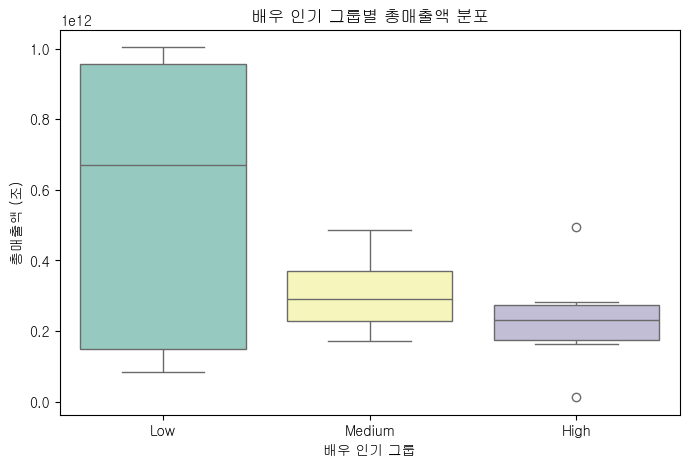

In [109]:
# 배우 인기도를 기준으로 그룹화
actor_revenue['popularity_group'] = pd.qcut(actor_revenue['social_followers'], 3, labels=["Low", "Medium", "High"])
print(actor_revenue['popularity_group'])

# 박스플롯 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(x='popularity_group', y='film_income', hue= 'popularity_group', data=actor_revenue, palette="Set3", legend=False)
plt.xlabel("배우 인기 그룹")
plt.ylabel("총매출액 (조)")
plt.title("배우 인기 그룹별 총매출액 분포")
plt.show()

actor	social_followers	film_count
이정재	        1000	        12
마동석	        200	            30
이병헌      	1500	        18
송강호	        500	            22
최민식	        300	            37
황정민	        400	            33
류승룡	        100	            23
조승우	        500	            10
강동원	        1200	        13
송혜교	        1800	        5
전지현	        600	            5
손예진	        1700	        14
김혜수	        1300	        15
전도연	        500	            14
하지원	        2000	        13
한효주	        1400	        14
엄정화	        900	            17
김윤진	        300         	9


인기 배우가 출연한 영화가 흥행하지 못하는 이유
1. 관객의 과도한 기대
기대에 미치지 못함: 인기 배우가 출연한 영화에 대해 기대가 과도하게 높아지면, 영화의 품질이 기대를 충족시키지 못했을 때 실망감을 줄 수 있다.
‘스타 마케팅’에 의존한 영화: 배우의 인기에 의존하는 영화들이 내용이 부실하거나 예측 가능한 전개를 갖고 있으면, 관객들이 쉽게 흥미를 잃을 수 있다.

2. 경쟁작의 존재
다른 흥행작과의 경쟁: 특정 시즌에 다른 대작 영화들이 동시에 개봉하면, 인기 배우가 출연한 영화가 상대적으로 밀릴 수 있다.
이미지 상쇄 효과: 인기 배우가 여러 작품에 동시에 출연할 경우, 관객이 그 배우에게 느끼는 신선함이나 매력이 감소할 수 있다.

3. 영화의 품질 문제
연출과 제작의 문제: 연출이 부실하거나, 촬영이나 편집이 미숙할 경우, 인기 배우라도 영화의 전반적인 퀄리티가 떨어져 관객들에게 실망감을 줄 수 있다.
연기 스타일의 부조화: 배우가 잘못된 캐릭터를 맡거나, 연기 스타일이 캐릭터와 맞지 않으면 영화의 몰입감이 떨어질 수 있다.

4. 마케팅 및 홍보
부족한 마케팅: 영화가 홍보가 부족하거나 잘못된 방식으로 마케팅될 경우, 배우의 인기도와 관계없이 관객들이 영화를 찾아보지 않게 될 수 있다.
대상 관객의 부재: 특정 배우가 인기를 끌더라도, 그 배우의 팬들이 특정 장르나 스타일의 영화에 관심이 없으면 영화가 흥행하지 않을 수 있다.

5. 스토리와 콘텐츠의 질
강력한 스토리라인 부족: 영화가 인기 배우를 보유하고 있더라도, 스토리가 약하거나 흥미롭지 않다면 관객의 관심을 끌지 못할 수 있다.
컨셉 또는 장르의 실패: 인기 배우가 출연하더라도 장르나 컨셉이 대중의 취향에 맞지 않거나, 기존의 다른 작품들과 차별화되지 않으면 흥행이 어려울 수 있다.

6. 영화의 타겟 관객층 부재
배우의 팬층과 영화의 타겟층 불일치: 인기 배우의 팬들이 그 배우의 출연 영화를 보러 오지만, 그 영화의 타겟 관객층이 다르면 흥행에 실패할 수 있다.
취향의 불일치: 예를 들어, 가족 영화를 좋아하는 배우 팬들이 성인용 영화에는 관심을 두지 않으면, 영화가 흥행하기 어려워질 수 있다.

따라서, 인기 배우가 출연했다고 해서 영화가 흥행하는 것은 아니며, 그 외의 요소들이 영화의 성공에 중요한 역할을 한다는 것을 알 수 있다.
흥행을 위해서는 배우의 인기도뿐만 아니라 스토리, 제작, 마케팅, 관객의 취향 등을 종합적으로 고려한 전략이 필요하는 것이 결론이다.